# Проект e-commerce: вариант 1

Продакт-менеджер Василий попросил вас проанализировать совершенные покупки и ответить на следующие вопросы:

1. Сколько у нас пользователей, которые совершили покупку только один раз? <em>(7 баллов)</em>

2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? <em>(5 баллов)</em>

3. По каждому товару определить, в какой день недели товар чаще всего покупается. <em>(5 баллов)</em>

4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. <em>(8 баллов)</em> 

5. Напиши функцию на python, позволяющую строить когортный анализ. В период с января по декабрь выяви когорту с самым высоким retention на 3-й месяц. Описание подхода можно найти тут. <em>(10 баллов)</em>

6. Построй RFM-кластеры для пользователей. Выведи для каждого кластера средние значения метрик R, F, M (и опиши подробно, как были построены метрики R, F, M). Описание подхода можно найти тут. <em>(35 баллов)</em>

In [1]:
# pip install --upgrade matplotlib

In [2]:
# from IPython.display import HTML

# display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**df_customers** — таблица с уникальными идентификаторами пользователей

customer_id — позаказный идентификатор пользователя (аналог номера паспорта)\
customer_unique_id —  уникальный идентификатор пользователя\
customer_zip_code_prefix —  почтовый индекс пользователя\
customer_city —  город доставки пользователя\
customer_state —  штат доставки пользователя

**df_orders** —  таблица заказов

order_id —  уникальный идентификатор заказа (номер чека)\
customer_id —  позаказный идентификатор пользователя (аналог номера паспорта)\
order_status —  статус заказа\
order_purchase_timestamp —  время создания заказа\
order_approved_at —  время подтверждения оплаты заказа\
order_delivered_carrier_date —  время передачи заказа в логистическую службу\
order_delivered_customer_date —  время доставки заказа\
order_estimated_delivery_date —  обещанная дата доставки

**df_order_items** —  товарные позиции, входящие в заказы

order_id —  уникальный идентификатор заказа (номер чека)\
order_item_id —  идентификатор товара внутри одного заказа\
product_id —  ид товара (аналог штрихкода)\
seller_id — ид производителя товара\
shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике\
price —  цена за единицу товара\
freight_value —  вес товара\

In [4]:
df_customers = pd.read_csv('olist_customers_dataset.csv')
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_order_items = pd.read_csv('olist_order_items_dataset.csv')

In [5]:
# df_customers = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/FUi5uSd6BfG_ig')
# df_orders = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/t9Li4JOfgxuUrg')
# df_order_items = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/Gbt-yAcQrOe3Pw')

In [6]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
# приведём даты к нужному типу данных

df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'])
df_orders['order_delivered_carrier_date'] = pd.to_datetime(df_orders['order_delivered_carrier_date'])
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])

In [9]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Пример структуры данных

In [10]:
df_customers.query("customer_id == '2e45292979b9b2700ea09560eeb0f803'")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
58260,2e45292979b9b2700ea09560eeb0f803,bb8a37225e0279ac8a274c9765617eaf,74663,goiania,GO


In [11]:
df_orders.query("order_id == '00143d0f86d6fbd9f9b38ab440ac16f5'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
36265,00143d0f86d6fbd9f9b38ab440ac16f5,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06


In [12]:
df_order_items.query("order_id == '00143d0f86d6fbd9f9b38ab440ac16f5'")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1


## 1. Сколько у нас пользователей, которые совершили покупку только один раз?

In [13]:
# перенесём customer_id из df_customers в df_orders

df_customers_orders = df_orders.merge(df_customers[['customer_id', 'customer_unique_id']], how='left', on='customer_id')
df_customers_orders = df_customers_orders[['order_status', 'customer_id', 'customer_unique_id']]

In [14]:
df_customers_orders.head()

,order_status,customer_id,customer_unique_id
0,delivered,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff
1,delivered,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231
2,delivered,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8
3,delivered,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977
4,delivered,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6


In [15]:
# проверка на незаполненные значения

df_customers_orders.isnull().sum()

order_status          0
customer_id           0
customer_unique_id    0
dtype: int64

In [16]:
# проверим на наличие пользователей с более чем одной оплаченной покупкой

orders_from_user = df_customers_orders \
    .query("order_status in ['processing', 'shipped', 'delivered']") \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'customer_id': 'count'}) \
    .rename(columns={'customer_id': 'number_orders'})

orders_from_user.query("number_orders > 1").shape[0]

2872

In [17]:
# посчитаем кол-во пользователей с одной оплаченной покупкой

users_1_order = orders_from_user.query("number_orders == 1")

print(f"Пользователей с одной покупкой: {users_1_order.shape[0]}")

Пользователей с одной покупкой: 91814


In [18]:
# проверка на то, что кол-во уникальных number_orders равно 1

users_1_order.nunique()

customer_unique_id    91814
number_orders             1
dtype: int64

### Пользователей с одной покупкой: *91814*

## 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [19]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [20]:
# проверим на пропуски

df_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [21]:
df_orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [22]:
pd.unique(df_orders['order_status'])

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

created —  создан\
approved —  подтверждён\
invoiced —  выставлен счёт\
processing —  в процессе сборки заказа\
shipped —  отгружен со склада\
delivered —  доставлен пользователю\
unavailable —  недоступен\
canceled —  отменён

In [23]:
# кол-во статусов заказов за всё время

orders_by_status = df_orders \
    .groupby('order_status', as_index=False) \
    .agg({'order_id': 'count'})

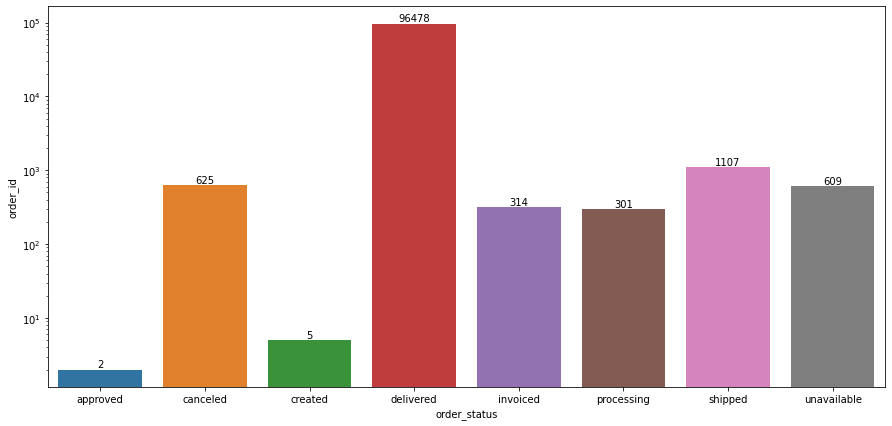

In [24]:
plt.figure(figsize=(15, 7))
ax = sns.barplot(data=orders_by_status, x='order_status', y='order_id')
ax.set_yscale("log")
ax.bar_label(ax.containers[0]);

In [25]:
df_orders_temp = df_orders.copy()

In [26]:
# колонка order_approved_at - время подтверждения оплаты, т.е. если это время есть, то заказ создан именно тогда

df_orders_temp['month'] = df_orders['order_approved_at'].to_numpy().astype('datetime64[M]')

In [27]:
df_orders_temp.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-01
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-01
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-01
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11-01
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-01


In [28]:
# кол-во статусов заказов в среднем за месяц

orders_by_month_status_t = df_orders_temp \
    .groupby(['month', 'order_status'], as_index=False) \
    .agg({'order_id': 'count'})

In [29]:
orders_by_month_status = orders_by_month_status_t \
    .pivot(index='month', columns='order_status', values='order_id') \
    .fillna(0).drop(columns='delivered') \
    .reset_index() \
    .set_axis(['month', 'approved', 'canceled', 'invoiced', 'processing', 'shipped', 'unavailable'], 
              axis=1, inplace=False)

In [30]:
orders_by_month_status.head()

,month,approved,canceled,invoiced,processing,shipped,unavailable
0,2016-09-01,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-10-01,0.0,20.0,18.0,2.0,9.0,6.0
2,2016-12-01,0.0,0.0,0.0,0.0,0.0,0.0
3,2017-01-01,0.0,2.0,11.0,8.0,16.0,8.0
4,2017-02-01,1.0,15.0,12.0,31.0,21.0,47.0


In [31]:
average_for_status = pd.DataFrame(orders_by_month_status.drop(columns='month').mean()) \
    .reset_index() \
    .set_axis(['status', 'average_for_all_months'], axis=1, inplace=False)

In [32]:
average_for_status

,status,average_for_all_months
0,approved,0.083333
1,canceled,20.166667
2,invoiced,13.083333
3,processing,12.541667
4,shipped,46.125000
5,unavailable,25.375000


### Из таблицы *average_for_status* можно сделать вывод, что:
- 00.083333 заказов не доставлется в месяц из-за того, что они *только что оформлены*
- 20.166667 заказов не доставлется в месяц из-за того, что они ***отменены***
- 13.083333 заказов не доставлется в месяц из-за того, что они *на стадии оплаты счёта*
- 12.541667 заказов не доставлется в месяц из-за того, что они *в процессе сборки*
- 46.125000 заказов не доставлется в месяц из-за того, что они *в процессе доставки*
- 25.375000 заказов не доставлется в месяц из-за того, что они ***утеряны или с ними случилось что-то ещё***

## 3. По каждому товару определить, в какой день недели товар чаще всего покупается.

In [33]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [34]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Покупка считается совершённой во время подтверждения оплаты заказа

In [35]:
df_order_items_mod = df_order_items.merge(df_orders[['order_id', 'order_approved_at']], 
                                          how='left', on='order_id')

df_order_items_mod = df_order_items_mod[['order_id', 'order_approved_at', 'product_id']]

In [36]:
df_order_items_mod.head()

,order_id,order_approved_at,product_id
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 09:45:35,4244733e06e7ecb4970a6e2683c13e61
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 11:05:13,e5f2d52b802189ee658865ca93d83a8f
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:48:30,c777355d18b72b67abbeef9df44fd0fd
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:10:18,7634da152a4610f1595efa32f14722fc
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 14:10:13,ac6c3623068f30de03045865e4e10089


Удалим те данные о покупках, у которых нет даты и времени подтверждения заказа (мы не можем определить день недели из-за этого)

In [37]:
df_order_items_mod.isnull().sum()

order_id              0
order_approved_at    15
product_id            0
dtype: int64

In [38]:
df_order_items_mod = df_order_items_mod.dropna()

In [39]:
df_order_items_mod.isnull().sum()

order_id             0
order_approved_at    0
product_id           0
dtype: int64

Добавим столбец day_of_week

In [40]:
df_order_items_mod['day_of_week'] = df_order_items_mod['order_approved_at'].dt.day_name()

In [41]:
df_order_items_mod.head()

,order_id,order_approved_at,product_id,day_of_week
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 09:45:35,4244733e06e7ecb4970a6e2683c13e61,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 11:05:13,e5f2d52b802189ee658865ca93d83a8f,Wednesday
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:48:30,c777355d18b72b67abbeef9df44fd0fd,Sunday
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:10:18,7634da152a4610f1595efa32f14722fc,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 14:10:13,ac6c3623068f30de03045865e4e10089,Saturday


In [42]:
df_order_items_mod = df_order_items_mod[['product_id', 'day_of_week']]

In [43]:
df_order_items_mod.head()

,product_id,day_of_week
0,4244733e06e7ecb4970a6e2683c13e61,Wednesday
1,e5f2d52b802189ee658865ca93d83a8f,Wednesday
2,c777355d18b72b67abbeef9df44fd0fd,Sunday
3,7634da152a4610f1595efa32f14722fc,Wednesday
4,ac6c3623068f30de03045865e4e10089,Saturday


In [44]:
product_best_day_sell = df_order_items_mod \
    .groupby('product_id', as_index=False) \
    .agg({'day_of_week': pd.Series.mode}) \
    .rename(columns={'day_of_week': 'best_day_of_week'})

In [45]:
product_best_day_sell.head()

,product_id,best_day_of_week
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Friday
3,000b8f95fcb9e0096488278317764d19,"[Friday, Wednesday]"
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday


### Информация, в какой день недели какой товар чаще всего покупается отражена в *product_best_day_sell*

## 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [46]:
df_order_items_mod = df_order_items \
    .merge(df_orders[['customer_id', 'order_id', 'order_status', 'order_approved_at']], how='left', on='order_id')

df_order_items_mod = df_order_items_mod[['order_id', 'product_id', 'customer_id', 'order_status', 'order_approved_at']]

In [47]:
df_order_items_mod.head()

,order_id,product_id,customer_id,order_status,order_approved_at
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 09:45:35
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 11:05:13
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:48:30
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:10:18
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 14:10:13


In [48]:
df_items_customers = df_order_items_mod.merge(df_customers, how='left', on='customer_id')

df_items_customers = df_items_customers[['order_id', 'product_id', 'customer_id', 
                                         'customer_unique_id', 'order_status', 'order_approved_at']]

In [49]:
df_items_customers.head()

,order_id,product_id,customer_id,customer_unique_id,order_status,order_approved_at
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,delivered,2017-09-13 09:45:35
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,delivered,2017-04-26 11:05:13
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,delivered,2018-01-14 14:48:30
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,delivered,2018-08-08 10:10:18
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,delivered,2017-02-04 14:10:13


In [50]:
df_items_customers['month'] = df_items_customers['order_approved_at'].to_numpy().astype('datetime64[M]')

In [51]:
# смотрим на итоговую таблицу

df_items_customers.head()

,order_id,product_id,customer_id,customer_unique_id,order_status,order_approved_at,month
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,delivered,2017-09-13 09:45:35,2017-09-01
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,delivered,2017-04-26 11:05:13,2017-04-01
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,delivered,2018-01-14 14:48:30,2018-01-01
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,delivered,2018-08-08 10:10:18,2018-08-01
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,delivered,2017-02-04 14:10:13,2017-02-01


In [52]:
# отберём совершённые заказы

df_items_customers = df_items_customers \
    .query("order_approved_at != 'nan' or order_status in ['processing', 'shipped', 'delivered']")

In [53]:
# проверка корректности таблицы

df_items_customers.query("order_id == '00143d0f86d6fbd9f9b38ab440ac16f5'")

,order_id,product_id,customer_id,customer_unique_id,order_status,order_approved_at,month
32,00143d0f86d6fbd9f9b38ab440ac16f5,e95ee6822b66ac6058e2e4aff656071a,2e45292979b9b2700ea09560eeb0f803,bb8a37225e0279ac8a274c9765617eaf,delivered,2017-10-16 16:07:52,2017-10-01
33,00143d0f86d6fbd9f9b38ab440ac16f5,e95ee6822b66ac6058e2e4aff656071a,2e45292979b9b2700ea09560eeb0f803,bb8a37225e0279ac8a274c9765617eaf,delivered,2017-10-16 16:07:52,2017-10-01
34,00143d0f86d6fbd9f9b38ab440ac16f5,e95ee6822b66ac6058e2e4aff656071a,2e45292979b9b2700ea09560eeb0f803,bb8a37225e0279ac8a274c9765617eaf,delivered,2017-10-16 16:07:52,2017-10-01


In [54]:
df_items_customers.nunique()

order_id              98666
product_id            32951
customer_id           98666
customer_unique_id    95420
order_status              7
order_approved_at     90174
month                    24
dtype: int64

In [55]:
df_items_customers.shape

(112650, 7)

In [56]:
df_items_customers.isnull().sum()

order_id               0
product_id             0
customer_id            0
customer_unique_id     0
order_status           0
order_approved_at     15
month                 15
dtype: int64

In [57]:
# кол-во купленных товаров каждым пользователем за всё время

df_customer_items = df_items_customers \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'order_status': 'count'}) \
    .rename(columns={'order_status': 'number_purchased_items'}) \
    .sort_values('number_purchased_items', ascending=False)

In [58]:
df_customer_items.head()

,customer_unique_id,number_purchased_items
74752,c8460e4251689ba205045f3ea17884a1,24
25885,4546caea018ad8c692964e3382debd19,21
73155,c402f431464c72e27330a67f7b94d4fb,20
39443,698e1cf81d01a3d389d96145f7fa6df8,20
5741,0f5ac8d5c31de21d2f25e24be15bbffb,18


In [59]:
# кол-во купленных товаров каждым пользователем за всё время по месяцам

df_cust_it_month = df_items_customers \
    .groupby(['customer_unique_id', 'month'], as_index=False) \
    .agg({'order_status': 'count'}) \
    .rename(columns={'order_status': 'number_purchased_items_in_month'}) \
    .sort_values('number_purchased_items_in_month', ascending=False)

In [60]:
df_cust_it_month.head()

,customer_unique_id,month,number_purchased_items_in_month
76222,c8460e4251689ba205045f3ea17884a1,2018-08-01,24
26385,4546caea018ad8c692964e3382debd19,2017-07-01,21
74602,c402f431464c72e27330a67f7b94d4fb,2018-02-01,20
40212,698e1cf81d01a3d389d96145f7fa6df8,2017-08-01,20
5861,0f5ac8d5c31de21d2f25e24be15bbffb,2017-11-01,18


In [61]:
df_cust_it_month.dtypes

customer_unique_id                         object
month                              datetime64[ns]
number_purchased_items_in_month             int64
dtype: object

In [62]:
df_cust_it_month['number_purchased_items_in_month_weekly'] = (df_cust_it_month['number_purchased_items_in_month'] / (
    df_cust_it_month['month'].dt.days_in_month / 7.))

In [63]:
df_cust_it_month.shape

(97301, 4)

In [64]:
df_cust_it_month.nunique()

customer_unique_id                        95407
month                                        24
number_purchased_items_in_month              19
number_purchased_items_in_month_weekly       42
dtype: int64

In [65]:
df_customer_items_weekly_month = df_cust_it_month \
    .pivot(index='customer_unique_id', columns='month', values='number_purchased_items_in_month_weekly') \
    .reset_index() \
    .fillna(0)

In [66]:
df_customer_items_weekly_month.head()

month,customer_unique_id,2016-09-01 00:00:00,2016-10-01 00:00:00,2016-12-01 00:00:00,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,...,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.225806,0.0,0.0,0.0,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.225806,0.0,0.0,0.0,0.0
2,0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.225806,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [67]:
df_cust_it_month.head()

,customer_unique_id,month,number_purchased_items_in_month,number_purchased_items_in_month_weekly
76222,c8460e4251689ba205045f3ea17884a1,2018-08-01,24,5.419355
26385,4546caea018ad8c692964e3382debd19,2017-07-01,21,4.741935
74602,c402f431464c72e27330a67f7b94d4fb,2018-02-01,20,5.000000
40212,698e1cf81d01a3d389d96145f7fa6df8,2017-08-01,20,4.516129
5861,0f5ac8d5c31de21d2f25e24be15bbffb,2017-11-01,18,4.200000


### Данные о среднем количестве покупок в неделю для каждого пользователя хранятся в таблице *df_customer_items_weekly_month*, а также в более компактном виде в таблице *df_customer_items_month*

## 5. Напиши функцию на python, позволяющую строить когортный анализ. В период с января по декабрь выяви когорту с самым высоким retention на 3-й месяц. Описание подхода можно найти тут.

### Подготовка датафрейма для функции

Объединяем таблицы df_orders и df_customers по колонке customer_id для получения уникального id пользователя для каждого заказа

In [68]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [69]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [70]:
df_orders_users = df_orders.merge(df_customers, how='left', on='customer_id')

In [71]:
df_orders_users.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [72]:
df_orders_users.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
customer_unique_id               96096
customer_zip_code_prefix         14994
customer_city                     4119
customer_state                      27
dtype: int64

Получаем таблицу заказов с количеством позиций в заказе и суммарной стоимостью

In [73]:
df_order_price = df_order_items \
    .groupby('order_id', as_index=False) \
    .agg({'seller_id': 'count', 'price': 'sum'}) \
    .rename(columns={'seller_id': 'number_products',
                     'price': 'total_price'})[['order_id', 'number_products', 'total_price']]

In [74]:
df_order_price.sort_values('total_price', ascending=False).head()

,order_id,number_products,total_price
1455,03caa2c082116e1d31e67e9ae3700499,8,13440.0
44467,736e1922ae60d0d6a89247b851902527,4,7160.0
3130,0812eb902a67711a1cb742b3cdaa65ae,1,6735.0
98298,fefacc66af859508bf1a7934eab1e97f,1,6729.0
94439,f5136e38d1a14a4dbd87dff67da82701,1,6499.0


Получаем итоговую таблицу для анализа

In [75]:
df_cohorts_raw = df_orders_users.merge(df_order_price, how='left', on='order_id')

In [76]:
df_cohorts_raw.shape

(99441, 14)

In [77]:
# избавляемся от неслучившихся заказов

df_cohorts_raw = df_cohorts_raw.query("order_status in ['processing', 'shipped', 'delivered']").dropna()

In [78]:
df_cohorts_raw.shape

(96455, 14)

In [79]:
# отбираем нужные колонки

df_cohorts_raw = df_cohorts_raw[['customer_unique_id', 'order_approved_at', 'total_price']] \
    .rename(columns={'order_approved_at': 'date_order'})

In [80]:
# итоговая таблица для когортного анализа

df_cohorts_raw.head()

,customer_unique_id,date_order,total_price
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 11:07:15,29.99
1,af07308b275d755c9edb36a90c618231,2018-07-26 03:24:27,118.70
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:55:23,159.90
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:45:59,45.00
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 22:20:29,19.90


In [81]:
df_cohorts_raw.nunique()

customer_unique_id    93336
date_order            88266
total_price            7634
dtype: int64

In [82]:
df_cohorts_raw.shape

(96455, 3)

### Непосредственно функции

In [83]:
def cohort_period(df):
    # отсчет с 1
    df['cohort_period'] = np.arange(len(df)) + 1
    return df

In [84]:
# [id, дата покупки, стоимость покупки]

def cohort_analysis(df_t):
    df = df_t.copy()
    
    # получение месяца каждой покупки
    
    df['month_order'] = df.iloc[:, 1].to_numpy().astype('datetime64[M]')
    
    # получение месяца первой покупки для каждого пользователя
    df_temp = df \
        .groupby(df.columns[0], as_index=False) \
        .agg({'month_order': np.min}) \
        .rename(columns={'month_order': 'month_join'})
    
    df = df.merge(df_temp, how='left', on='customer_unique_id')
    
    # оставляем нужные столбцы
    df = df[[df.columns[0], 'month_order', 'month_join', df.columns[2]]]
    
    # добавляем столбик total_orders, заполненный нулями
    df.insert(len(df.columns), 'total_orders', 0, allow_duplicates=False)
    
    # 
    temp = df.groupby(['month_join', 'month_order'])
    
    df_cohorts = temp \
        .agg({df.columns[0]: pd.Series.nunique, df.columns[3]: 'sum', 'total_orders': 'count'}) \
        .rename(columns={df.columns[0]: 'total_users'})
    
    df_cohorts = df_cohorts.groupby(level=0).apply(cohort_period).reset_index()
    
    df_cohorts['month_join'] = df_cohorts['month_join'].dt.strftime('%Y-%m')
    
    df_cohorts = df_cohorts.set_index(['cohort_period', 'month_join'])
    
    cohort_group_size = df_cohorts['total_users'].groupby(level=1).first()
    
    df_cohorts = np.round(df_cohorts['total_users'].unstack(1).divide(cohort_group_size, axis=1).T * 100, 2)
    
    return df_cohorts

### Визуализация

In [85]:
user_retention = cohort_analysis(df_cohorts_raw)

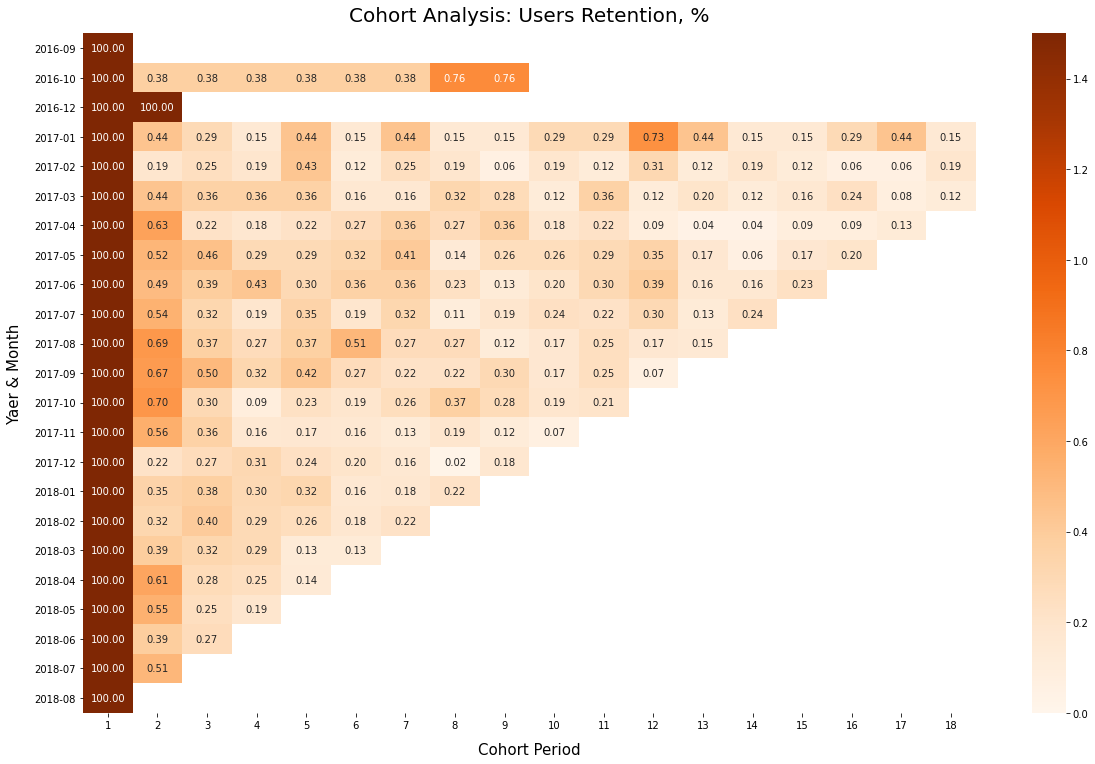

In [86]:
plt.figure(figsize=(20, 12.5))

chart = sns.heatmap(
    user_retention,
    annot=True,
    vmin=0,
    vmax=1.5,
    mask=user_retention.isnull(),
    cmap='Oranges',
    fmt='0.2f'
)

chart.set_ylabel('Yaer & Month', fontdict={'fontsize': 15}, labelpad=12)
chart.set_xlabel('Cohort Period', fontdict={'fontsize': 15}, labelpad=12)
chart.set_title("Cohort Analysis: Users Retention, %", fontdict={'fontsize': 20}, pad=12);

### Выявляем когорту с самым высоким retention на 3-й месяц в период с января по декабрь

In [87]:
period = ['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
          '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12']

user_retention[user_retention.index.isin(period)].iloc[:, 2].idxmax()

'2017-09'

## 6. Построй RFM-кластеры для пользователей. Выведи для каждого кластера средние значения метрик R, F, M (и опиши подробно, как были построены метрики R, F, M).

R — **recency**   — давность (как давно ваши клиенты что-то покупали) \
F — **frequency** — частота (как часто клиенты покупают) \
M — **monetary**  — деньги (общая сумма покупок)

In [88]:
df_cohorts_raw.head()

,customer_unique_id,date_order,total_price
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 11:07:15,29.99
1,af07308b275d755c9edb36a90c618231,2018-07-26 03:24:27,118.70
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:55:23,159.90
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:45:59,45.00
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 22:20:29,19.90


In [89]:
data = df_cohorts_raw.copy()

In [90]:
data = data.rename(columns={'customer_unique_id': 'user_id', 'date_order': 'order_date', 'total_price': 'order_value'})

In [91]:
data = data[['order_date', 'user_id', 'order_value']]

In [92]:
data[['order_date', 'user_id', 'order_value']].to_csv('data_to_rfm.csv', index=False)

### Получим метрики r f m для каждого юзера

In [93]:
data.head()

,order_date,user_id,order_value
0,2017-10-02 11:07:15,7c396fd4830fd04220f754e42b4e5bff,29.99
1,2018-07-26 03:24:27,af07308b275d755c9edb36a90c618231,118.70
2,2018-08-08 08:55:23,3a653a41f6f9fc3d2a113cf8398680e8,159.90
3,2017-11-18 19:45:59,7c142cf63193a1473d2e66489a9ae977,45.00
4,2018-02-13 22:20:29,72632f0f9dd73dfee390c9b22eb56dd6,19.90


In [94]:
df_monetary = data \
    .groupby('user_id', as_index=False) \
    .agg({'order_value': 'sum'}) \
    .rename(columns={'order_value': 'monetary'})

In [95]:
df_recency = data \
    .groupby('user_id', as_index=False) \
    .agg({'order_date': 'max'}) \
    .rename(columns={'order_date': 'recency'})

max_date = data['order_date'].max()

df_recency['recency'] = (df_recency['recency'] - max_date).dt.days

In [96]:
df_frequency = data \
    .groupby('user_id', as_index=False) \
    .agg({'order_value': 'count'}) \
    .rename(columns={'order_value': 'frequency'})

# number_of_months = len(np.unique(data['order_date'].to_numpy().astype('datetime64[M]')))

# df_frequency['frequency'] = df_frequency['frequency'] / number_of_months

In [97]:
df_frequency.query("user_id == '3e43e6105506432c953e165fb2acf44c'")

,user_id,frequency
22774,3e43e6105506432c953e165fb2acf44c,9


In [98]:
df_monetary.query("user_id == '3e43e6105506432c953e165fb2acf44c'")

,user_id,monetary
22774,3e43e6105506432c953e165fb2acf44c,1000.85


In [99]:
df_recency.query("user_id == '3e43e6105506432c953e165fb2acf44c'")

,user_id,recency
22774,3e43e6105506432c953e165fb2acf44c,-183


In [100]:
df_RFM = df_recency.merge(df_frequency, on='user_id').merge(df_monetary, on='user_id')

In [101]:
# итоговая таблица с r f m метриками для каждого пользователя

df_RFM.head()

,user_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,-112,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,-114,1,18.90
2,0000f46a3911fa3c0805444483337064,-537,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,-321,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,-288,1,180.00


In [102]:
df_RFM.query("user_id == '3e43e6105506432c953e165fb2acf44c'")

,user_id,recency,frequency,monetary
22774,3e43e6105506432c953e165fb2acf44c,-183,9,1000.85


In [103]:
df_RFM.shape

(93336, 4)

In [104]:
data.shape

(96455, 3)

### Используем скрипт rfmizer для кластеризации пользователей

In [105]:
%run rfmizer.py -h

usage: rfmizer.py [-h] [--log-level LOG_LEVEL] config-file input-file

positional arguments:
  config-file           configuration file
  input-file            input data file

optional arguments:
  -h, --help            show this help message and exit
  --log-level LOG_LEVEL
                        logging level, defaults to WARNING


<Figure size 432x288 with 0 Axes>

In [106]:
%run rfmizer.py config.yaml data_to_rfm.csv

/home/jupyter-p-mescherjakov-18/first_project/rfmizer.py:43: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  conf = yaml.load(f)


In [107]:
rfm_borders = pd.read_csv('RFM_test_09.02.2022_borders.csv')
rfm_borders

,dimension,segment,border
0,frequency,1,2.000
1,frequency,2,3.000
2,monetary,1,57.895
3,monetary,2,124.025
4,recency,1,-288.000
5,recency,2,-147.000


In [108]:
rfm_mapping = pd.read_csv('RFM_test_09.02.2022_mapping.csv')
rfm_mapping.head()

,user_id,frequency,monetary,recency
0,7c396fd4830fd04220f754e42b4e5bff,2,1,1
1,af07308b275d755c9edb36a90c618231,1,2,3
2,3a653a41f6f9fc3d2a113cf8398680e8,1,3,3
3,7c142cf63193a1473d2e66489a9ae977,1,1,2
4,72632f0f9dd73dfee390c9b22eb56dd6,1,1,2


In [109]:
rfm_mapping.query("user_id == '3e43e6105506432c953e165fb2acf44c'")

,user_id,frequency,monetary,recency
2921,3e43e6105506432c953e165fb2acf44c,3,3,2


In [110]:
rfm_ratios = pd.read_csv('RFM_test_09.02.2022_ratios.csv')
rfm_ratios.head()

,frequency,monetary,recency,bid ratio
0,2,1,2,2.858414
1,1,1,3,0.811343
2,1,3,2,1.267565
3,1,2,2,0.776271
4,1,1,1,0.390553


### По итогу проведения RFM анализа получены 3 таблицы:
- *RFM_test_09.02.2022_mapping.csv* - содержит user_id и 3 признака для каждого user_id, описывающих юзера
- *RFM_test_09.02.2022_ratios.csv* - содержит все уникальные комбинации признаков и коэффициент, который является мультипликатором ставки для каждого из пересечений сегментов пользователей, который создает скрипт RFMizer. Это означает, что если ранее ставка для закупки трафика была равна 10 рублям, то при работе с отдельными сегментами, например для сегмента 2,1,2, ставку 10 рублей необходимо умножить на мультипликатор 3.58 (значение округлено до сотых)
- *RFM_test_09.02.2022_borders.csv* - содержит границы, по которым разбились данные

In [111]:
rfm_temp = rfm_mapping.merge(df_RFM, on='user_id')

In [112]:
rfm_mean = rfm_temp \
    .groupby(['frequency_x', 'monetary_x', 'recency_x'], as_index=False) \
    .agg({'recency_y': 'mean', 'frequency_y': 'mean', 'monetary_y': 'mean'}) \
    .rename(columns={'recency_y': 'mean_recency', 'frequency_y': 'mean_frequency', 'monetary_y': 'mean_monetary',
                     'frequency_x': 'frequency_class', 'monetary_x': 'monetary_class', 'recency_x': 'recency_class'})

In [113]:
rfm_mean

,frequency_class,monetary_class,recency_class,mean_recency,mean_frequency,mean_monetary
0,1,1,1,-419.871616,1.004234,34.327007
1,1,1,2,-218.983500,1.001907,34.766580
2,1,1,3,-73.925095,1.001302,34.574274
3,1,2,1,-415.938208,1.011322,86.397509
4,1,2,2,-220.759120,1.007846,88.369026
5,1,2,3,-75.654446,1.002782,88.869688
6,1,3,1,-417.857356,1.020846,306.822765
7,1,3,2,-219.068584,1.022601,278.354174
8,1,3,3,-76.110086,1.005851,298.752887
9,2,1,1,-394.607143,2.008929,74.022232


### *rfm_mean* - итоговая таблица, содержащая для каждого кластера средние значения метрик R, F, M